In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import tensorflow as tf
import os, sys, time
import utils, optimization, metrics, plot, data
import pickle

from model import WGanModel, LapGanModel
from gan import CosmoGAN

# Parameters

In [10]:
ns = 64
nsamples = 500
k = 10
try_resume = False

# Data handling

Load the data

In [5]:
images, raw_images = data.load_samples(nsamples = nsamples, permute=False, k=k)
images = data.make_smaller_samples(images, ns)
raw_images = data.make_smaller_samples(raw_images, ns)   

Select 500 samples out of 15000.


Let us plot 16 images

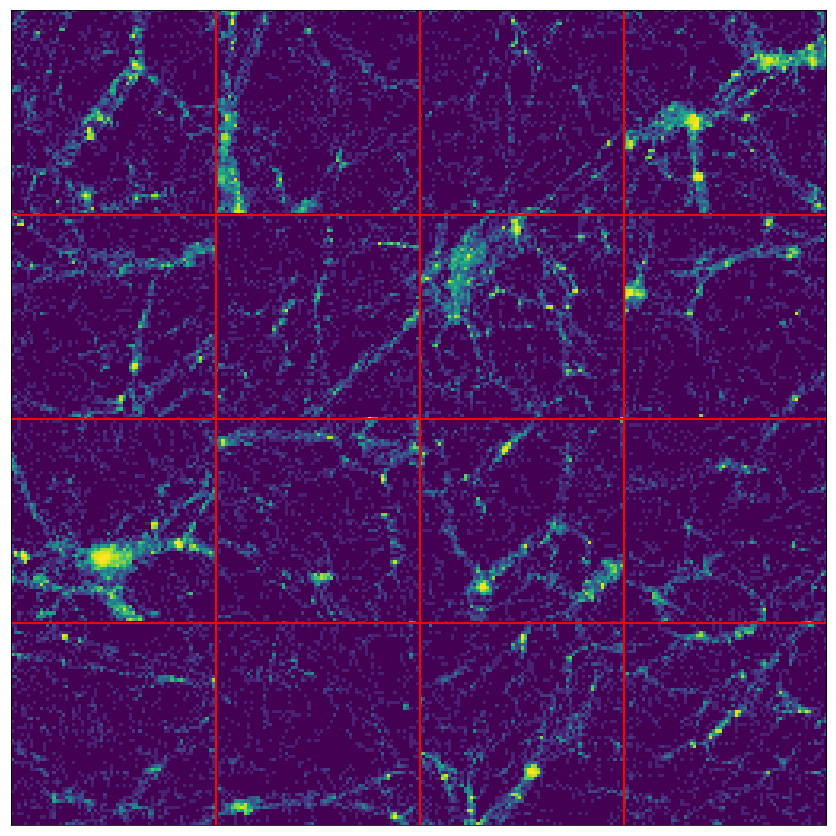

In [6]:
plt.figure(figsize=(15,15))
utils.draw_images(images,nx=4,ny=4,px=ns,py=ns)

# A) The WGAN

In [7]:
def current_time_str():
    import time, datetime
    d = datetime.datetime.fromtimestamp(time.time())
    return str(d.year)+ '_' + str(d.month)+ '_' + str(d.day)+ '_' + str(d.hour)+ '_' + str(d.minute)

# time_str = current_time_str() 
time_str = 'test'
global_path = '../../saved_result/'

name = 'WGAN{}'.format(ns)

## Parameters

In [12]:
bn = False

params_discriminator = dict()
params_discriminator['stride'] = [2, 2, 2]
params_discriminator['nfilter'] = [16, 32, 32]
params_discriminator['shape'] = [[5, 5],[5, 5], [5, 5]]
params_discriminator['batch_norm'] = [bn, bn, bn]
params_discriminator['full'] = [32]
params_discriminator['minibatch_reg'] = True
params_discriminator['summary'] = True

params_generator = dict()
params_generator['stride'] = [2, 2, 1]
params_generator['latent_dim'] = 100
params_generator['nfilter'] = [32, 64, 1]
params_generator['shape'] = [[5, 5], [5, 5], [5, 5]]
params_generator['batch_norm'] = [bn, bn]
params_generator['full'] = [16*16*32]
params_generator['summary'] = True
params_generator['non_lin'] = 'tanh'

params_optimization = dict()
params_optimization['gamma_gp'] = 10
params_optimization['batch_size'] = 32
params_optimization['gen_optimizer'] = 'rmsprop' # rmsprop / adam / sgd
params_optimization['disc_optimizer'] = 'rmsprop' # rmsprop / adam /sgd
params_optimization['disc_learning_rate'] = 3e-5
params_optimization['gen_learning_rate'] = 3e-5
params_optimization['beta1'] = 0.9
params_optimization['beta2'] = 0.999
params_optimization['epsilon'] = 1e-8
params_optimization['epoch'] = 50


params_cosmology = dict()
params_cosmology['clip_max_real'] = False
params_cosmology['log_clip'] = 0.1
params_cosmology['sigma_smooth'] = 1
params_cosmology['k'] = k
params_cosmology['Npsd'] = 500


params = dict()
params['generator'] = params_generator
params['discriminator'] = params_discriminator
params['optimization'] = params_optimization
params['cosmology'] = params_cosmology

params['normalize'] = False
params['image_size'] = [ns, ns]
params['prior_distribution'] = 'gaussian'
params['sum_every'] = 200
params['viz_every'] = 200
params['save_every'] = 2000
params['name'] = name
params['summary_dir'] = global_path + params['name'] + '_' + time_str +'_summary/'
params['save_dir'] = global_path + params['name'] + '_' + time_str + '_checkpoints/'

## Build the model

In [13]:
resume = False

if try_resume:
    try:
        with open(params['save_dir']+'params.pkl', 'rb') as f:
            params = pickle.load(f)
        resume = True
        print('Resume, the training will start from the last iteration!')
    except:
        print('No resume, the training will start from the beginning!')

In [15]:
wgan = CosmoGAN(params, WGanModel)

Generator 
------------------------------------------------------------
     The input is of size (?, 100)
     0 Full layer with 8192 outputs
         Size of the variables: (?, 8192)
     Reshape to (?, 16, 16, 32)
     1 Deconv layer with 32 channels
         Batch norm
         Size of the variables: (?, 32, 32, 32)
     2 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 64, 64, 64)
     3 Deconv layer with 1 channels
         Size of the variables: (?, 64, 64, 1)
    Non lienarity: tanh
     The output is of size (?, 64, 64, 1)
------------------------------------------------------------

Discriminator 
------------------------------------------------------------
     The input is of size (?, 64, 64, 1)
     0 Conv layer with 16 channels
         Size of the variables: (?, 32, 32, 16)
     1 Conv layer with 32 channels
         Size of the variables: (?, 16, 16, 32)
     2 Conv layer with 32 channels
         Size of the variables: (?, 8, 8, 32

## Train the model
Note that the input is the processed data... Maybe, we should change that

In [ ]:
wgan.train(images, resume=resume)

Erease recursively directory: ../../saved_result/WGAN64_test_summary/
Erease recursively directory: ../../saved_result/WGAN64_test_checkpoints/
